In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('heart_disease_df_1.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0.0,125,212.0,0,1.0,168,0,NaN,2,2,3,0
1,53,1,0.0,140,203.0,1,0.0,155,1,NaN,0,0,3,0
2,70,1,0.0,145,174.0,0,1.0,125,1,NaN,0,0,3,0
3,61,1,0.0,148,203.0,0,1.0,161,0,NaN,2,1,3,0
4,62,0,0.0,138,294.0,1,1.0,106,0,NaN,1,3,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1076 non-null   int64  
 1   sex       1076 non-null   int64  
 2   cp        1023 non-null   float64
 3   trestbps  1076 non-null   int64  
 4   chol      1021 non-null   float64
 5   fbs       1076 non-null   int64  
 6   restecg   1028 non-null   float64
 7   thalach   1076 non-null   int64  
 8   exang     1076 non-null   int64  
 9   oldpeak   0 non-null      float64
 10  slope     1076 non-null   int64  
 11  ca        1076 non-null   int64  
 12  thal      1076 non-null   int64  
 13  target    1076 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 117.8 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1076.000000,1076.000000,1023.000000,1076.000000,1021.000000,1076.000000,1028.000000,1076.000000,1076.000000,0.0,1076.000000,1076.000000,1076.000000,1076.000000
mean,54.548327,0.690520,0.947214,131.752788,245.537708,0.148699,0.527237,149.152416,0.331784,NaN,1.385688,0.762082,2.328996,0.512082
std,9.002247,0.462494,1.024719,17.471844,50.346192,0.355957,0.527932,22.813766,0.471073,NaN,0.618279,1.034787,0.617222,0.500086
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,NaN,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,NaN,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,NaN,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,NaN,2.000000,4.000000,3.000000,1.000000


In [19]:
df['sex'].value_counts()

1    743
0    333
Name: sex, dtype: int64

Проверим сбалансирован ли таргет

In [7]:
df['target'].value_counts()

1    551
0    525
Name: target, dtype: int64

In [29]:
missing_values = df.isna().sum()
missing_values

age          0
sex          0
cp          53
trestbps     0
chol        55
fbs          0
restecg     48
thalach      0
exang        0
slope        0
ca           0
thal         0
target       0
dtype: int64

In [ ]:
Три колонки содержат пропуски. 'cp','chol','restecg'

In [31]:
df = df.apply(lambda col: col.fillna(col.mean()), axis=0)

In [33]:
missing_values = df.isna().sum()
missing_values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
slope       0
ca          0
thal        0
target      0
dtype: int64

Заполнил пропуски в этих колонках средним значением по колонке

In [9]:
df['oldpeak'].isnull().all()

True

In [24]:
df = df.drop('oldpeak', axis='columns')

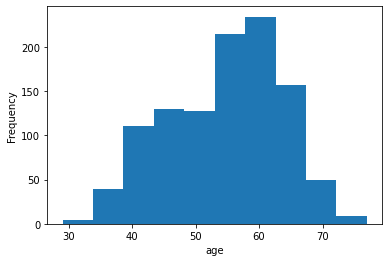

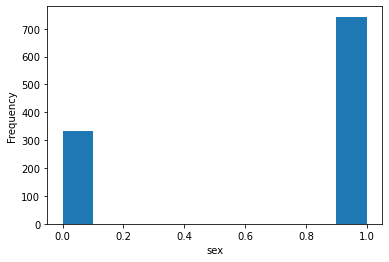

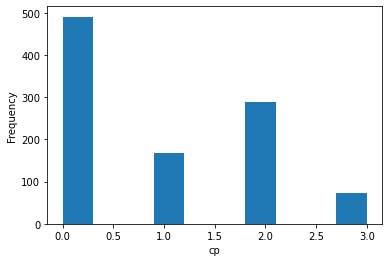

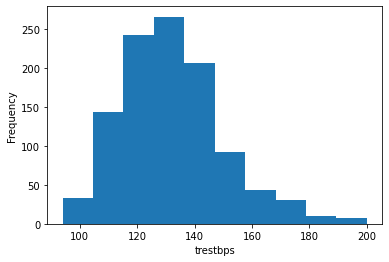

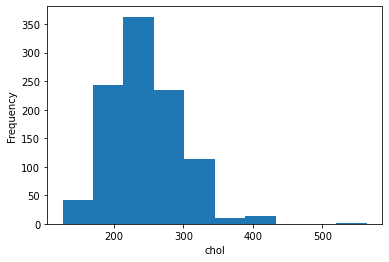

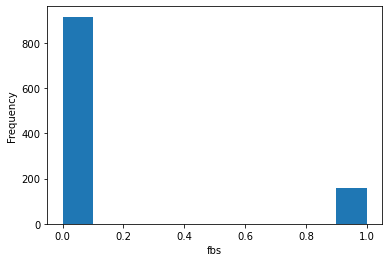

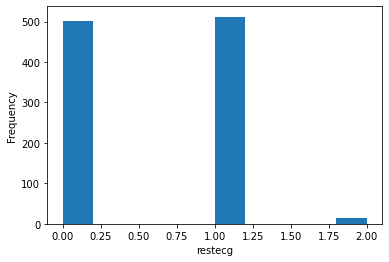

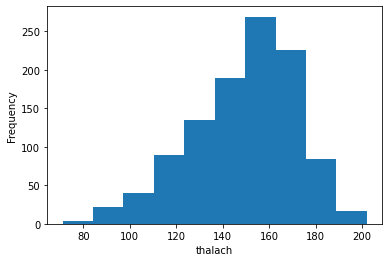

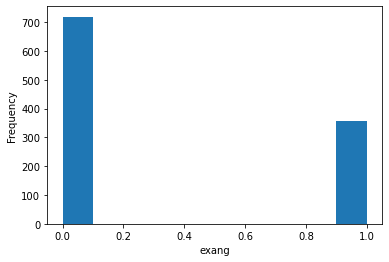

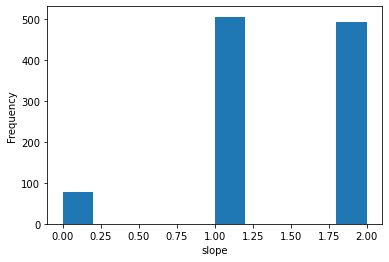

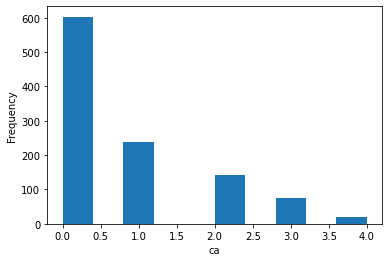

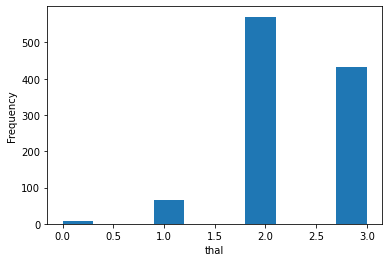

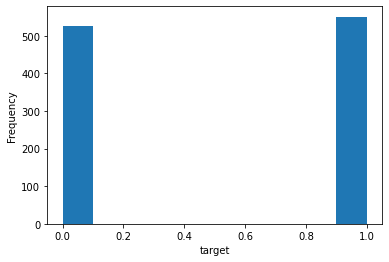

In [25]:
for col in df.columns.tolist():
    df[col].plot(kind='hist')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [55]:
df_X = df[df.columns.tolist()[:-1]]
df_y = df['target']

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
X_train, X_test,y_train,y_test = train_test_split(df_X,df_y,test_size=0.2, random_state=42)
norm=Normalizer()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.fit_transform(X_test)

Разделил таблицу на тренировочную и тестовую, и нормализовал фичи

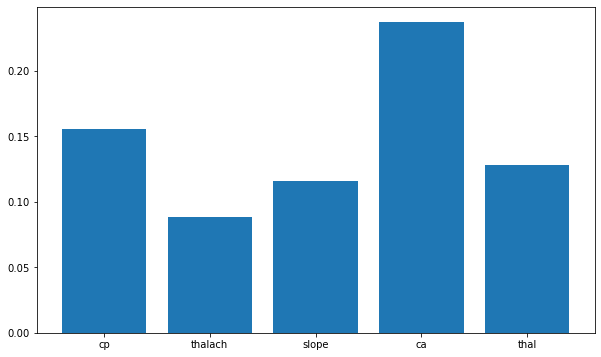

In [72]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1,class_weight='balanced',max_depth=5)
rf.fit(X_train_norm,y_train)
model = SelectFromModel(rf,prefit=True)
features_bool = model.get_support()
features = df_X.columns[features_bool]
importance = rf.feature_importances_[features_bool]
feature_importance = pd.DataFrame({'feature':features,'importance':importance})
plt.figure(figsize=(10,6))
plt.bar(feature_importance['feature'],feature_importance['importance'])
plt.show()

C помощью feature_selection нашли наиболее влияющие на таргет фичи

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

## Тренировка заново с df. Модель - SVC

In [77]:
df_X = df[df.columns.tolist()[:-1]]
df_y = df['target']

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0], dtype=int64)

In [99]:
y_pred

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0], dtype=int64)

In [87]:
from sklearn.metrics import balanced_accuracy_score
bal_accuracy = balanced_accuracy_score(y_test,y_pred)
print(f"Balanced Accuracy:{bal_accuracy:.2f}")

Balanced Accuracy:0.84


In [102]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix
kfold = KFold(n_splits=5,shuffle=True,random_state=42)
cv_results = cross_val_score(svc_model,df_X,df_y,cv=kfold,scoring='balanced_accuracy')
print(f"CV Balanced Accuracies:{[round(i,2) for i in cv_results]}")
y_pred_full = svc_model.predict(df_X)
cm = confusion_matrix(df_y, y_pred_full)
cm



CV Balanced Accuracies:[0.84, 0.82, 0.83, 0.86, 0.8]


array([[402, 123],
       [ 45, 506]], dtype=int64)

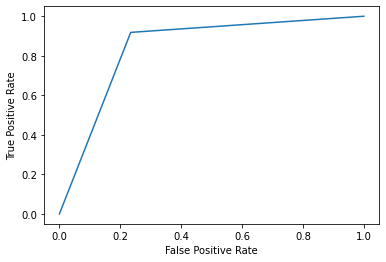

AUC: 0.842


In [105]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(df_y,  y_pred_full)

# построение ROC кривой
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
auc = metrics.roc_auc_score(df_y,  y_pred_full)
print("AUC: %.3f" % auc)

## Попробую потренировать оставив только selected_features

In [107]:
features

Index(['cp', 'thalach', 'slope', 'ca', 'thal'], dtype='object')

In [114]:
X=df[features]
y=df['target']

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)
y_pred_test = svc_model.predict(X_test)

In [116]:
from sklearn.metrics import balanced_accuracy_score
bal_accuracy = balanced_accuracy_score(y_test,y_pred_test)
print(f"Balanced Accuracy:{bal_accuracy:.2f}")

Balanced Accuracy:0.82


In [118]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix
kfold = KFold(n_splits=5,shuffle=True,random_state=42)
cv_results = cross_val_score(svc_model,X,y,cv=kfold,scoring='balanced_accuracy')
print(f"CV Balanced Accuracies:{[round(i,2) for i in cv_results]}")
y_pred_full = svc_model.predict(X)
cm = confusion_matrix(y, y_pred_full)
cm

CV Balanced Accuracies:[0.82, 0.78, 0.79, 0.84, 0.79]


array([[390, 135],
       [ 66, 485]], dtype=int64)

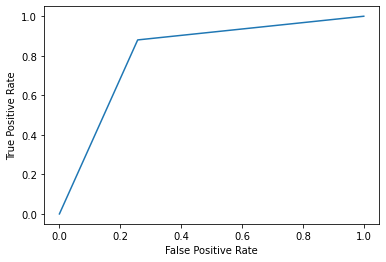

AUC: 0.812


In [119]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y,  y_pred_full)

# построение ROC кривой
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
auc = metrics.roc_auc_score(y,  y_pred_full)
print("AUC: %.3f" % auc)

## Попробую так же на всех колонках только нормализовав данные

In [120]:
X=df[df.columns.tolist()[:-1]]
y=df['target']

In [122]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
norm=Normalizer()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.fit_transform(X_test)

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)
y_pred_test = svc_model.predict(X_test)

In [124]:
from sklearn.metrics import balanced_accuracy_score
bal_accuracy = balanced_accuracy_score(y_test,y_pred_test)
print(f"Balanced Accuracy:{bal_accuracy:.2f}")

Balanced Accuracy:0.84


In [125]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix
kfold = KFold(n_splits=5,shuffle=True,random_state=42)
cv_results = cross_val_score(svc_model,X,y,cv=kfold,scoring='balanced_accuracy')
print(f"CV Balanced Accuracies:{[round(i,2) for i in cv_results]}")
y_pred_full = svc_model.predict(X)
cm = confusion_matrix(y, y_pred_full)
cm

CV Balanced Accuracies:[0.84, 0.82, 0.83, 0.86, 0.8]


array([[402, 123],
       [ 45, 506]], dtype=int64)

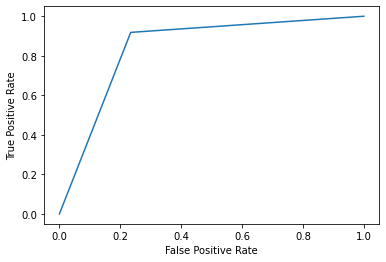

AUC: 0.842


In [126]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y,  y_pred_full)

# построение ROC кривой
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
auc = metrics.roc_auc_score(y,  y_pred_full)
print("AUC: %.3f" % auc)